In [1]:
import glob

import csv
import statistics
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

plt.style.use(['science', 'ieee', 'no-latex'])  #pip install SciencePlots==1.0.9

In [2]:
def imprt():
    M = {}
    P = {}
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/missions_alternativeCT.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            M[row[0]] = np.genfromtxt(row[1:10], dtype='int')
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/pilots.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            P[row[0]] = np.genfromtxt(row[1:6], dtype='int')
    return M, P

In [3]:
def read_history_live(hist):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 41
        else:
            check_min = total_sorties_p >= 58
        count = 0
        for m in M:     
            if hist[p][m] - M[m][P[p][0]] < 0:
                count += 1
                print(f'min LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 69
        else:
            check_desired = total_sorties_p >= 73
        count = 0
        for m in M:
            if hist[p][m] - M[m][P[p][1]] < 0:
                count += 1
                print(f'desired LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [4]:
def read_history_sim(hist_sim):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist_sim[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 37
        else:
            check_min = total_sorties_p >= 42
        count = 0
        for m in M:     
            if hist_sim[p][m] - M[m][P[p][2]] < 0:
                count += 1
                print(f'min SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist_sim[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 53
        else:
            check_desired = total_sorties_p >= 72
        count = 0
        for m in M:
            if hist_sim[p][m] - M[m][P[p][P[p][3]]] < 0:
                count += 1
                print(f'desired SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [5]:
M, P = imprt()

In [6]:
data = np.full((len(glob.glob('*CTresults_live.txt')),6), 0)
i = 0
print('live missions:')
for file in glob.glob('*CTresults_live.txt'):
    with open(file) as f:
        hist = json.load(f)
        min_CT, des_CT, sorties, no_sorties_live = read_history_live(hist)
        data[i][0] = min_CT
        data[i][1] = des_CT
        data[i][2] = sorties
        i += 1
i = 0
print('sim missions:')
for simfile in glob.glob('*CTresults_sim.txt'):
    with open(simfile) as g:
        hist_sim = json.load(g)
        min_CT, des_CT, sorties, no_sorties_sim = read_history_sim(hist_sim)
        data[i][3] = min_CT
        data[i][4] = des_CT
        data[i][5] = sorties
        i += 1

live missions:
min LIVE failed for pilot Stinger on mission ATA_n_4
min LIVE failed for pilot Kenny on mission ATA_n_4
desired LIVE failed for pilot Stinger on mission ATA2_d_4
desired LIVE failed for pilot Stinger on mission ATA_n_4
desired LIVE failed for pilot Merlin on mission ATA1_d_4
desired LIVE failed for pilot Kenny on mission ATA2_d_4
desired LIVE failed for pilot Kenny on mission ATG_d_4
desired LIVE failed for pilot Kenny on mission ATA_n_4
desired LIVE failed for pilot Chipper on mission ATA1_d_4
desired LIVE failed for pilot Zone on mission ATA1_d_4
desired LIVE failed for pilot Zone on mission ATA_n_2
min LIVE failed for pilot Charlie on mission ATA_n_4
desired LIVE failed for pilot Charlie on mission ATA_n_4
min LIVE failed for pilot Iceman on mission ATG_n_4
min LIVE failed for pilot Sundown on mission ATG_n_4
desired LIVE failed for pilot Iceman on mission ATG_n_4
desired LIVE failed for pilot Sundown on mission ATG_n_4
desired LIVE failed for pilot Chipper on mission

In [7]:
pilotFL = list()
for p in P:
    pilotFL.append(P[p][4])
print(no_sorties_live)
print(sum(no_sorties_live))
print(no_sorties_sim)
print(sum(no_sorties_sim))
print(pilotFL)
#for i in range(len(no_sorties_live)):
 #   print(no_sorties_live[i]+(no_sorties_sim[i]))

[89, 90, 86, 88, 86, 87, 85, 82, 83, 85, 83, 87, 83, 83, 89, 86, 82, 87]
1541
[68, 71, 68, 72, 86, 88, 88, 86, 66, 70, 70, 63, 90, 85, 85, 89, 73, 65]
1383
[4, 4, 2, 2, 0, 0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 0, 4, 4]


In [8]:
comp = []
for i in range(len(data)):
    print(data[i])
    print(min(data[i]))
    comp.append(min(data[i]))

[  16   15 1489   18   18 1361]
15
[  18   16 1551   18   18 1411]
16
[  17   17 1522   18   18 1383]
17
[  18   18 1531   18   18 1368]
18
[  16   15 1515   18   18 1354]
15
[  17   16 1577   18   18 1378]
16
[  17   17 1533   18   18 1376]
17
[  18   18 1542   18   18 1390]
18
[  17   16 1527   18   18 1386]
16
[  17   16 1547   18   18 1391]
16
[  18   16 1538   18   18 1392]
16
[  18   18 1538   18   18 1381]
18
[  17   17 1550   18   18 1398]
17
[  18   17 1517   18   18 1383]
17
[  18   16 1524   18   18 1369]
16
[  18   16 1499   18   18 1391]
16
[  18   17 1533   18   18 1356]
17
[  18   16 1553   18   18 1404]
16
[  17   17 1563   18   18 1407]
17
[  18   18 1582   18   18 1387]
18
[  18   18 1553   18   18 1389]
18
[  18   17 1549   18   18 1392]
17
[  18   17 1550   18   18 1405]
17
[  18   17 1510   18   18 1394]
17
[  18   16 1527   18   18 1388]
16
[  17   17 1533   18   18 1374]
17
[  17   17 1531   18   18 1374]
17
[  17   16 1556   18   18 1405]
16
[  16   16 1567   18

In [9]:
print(sum(comp)/len(comp))

16.7


15
16
17
18
15
16
17
18
16
16
16
18
17
17
16
16
17
16
17
18
18
17
17
17
16
17
17
16
16
18


{'whiskers': [<matplotlib.lines.Line2D at 0x250e6aa79d0>,
 'caps': [<matplotlib.lines.Line2D at 0x250e6abd0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x250e6aa7670>],
 'medians': [<matplotlib.lines.Line2D at 0x250e6abd790>],
 'fliers': [<matplotlib.lines.Line2D at 0x250e6abda90>],
 'means': []}

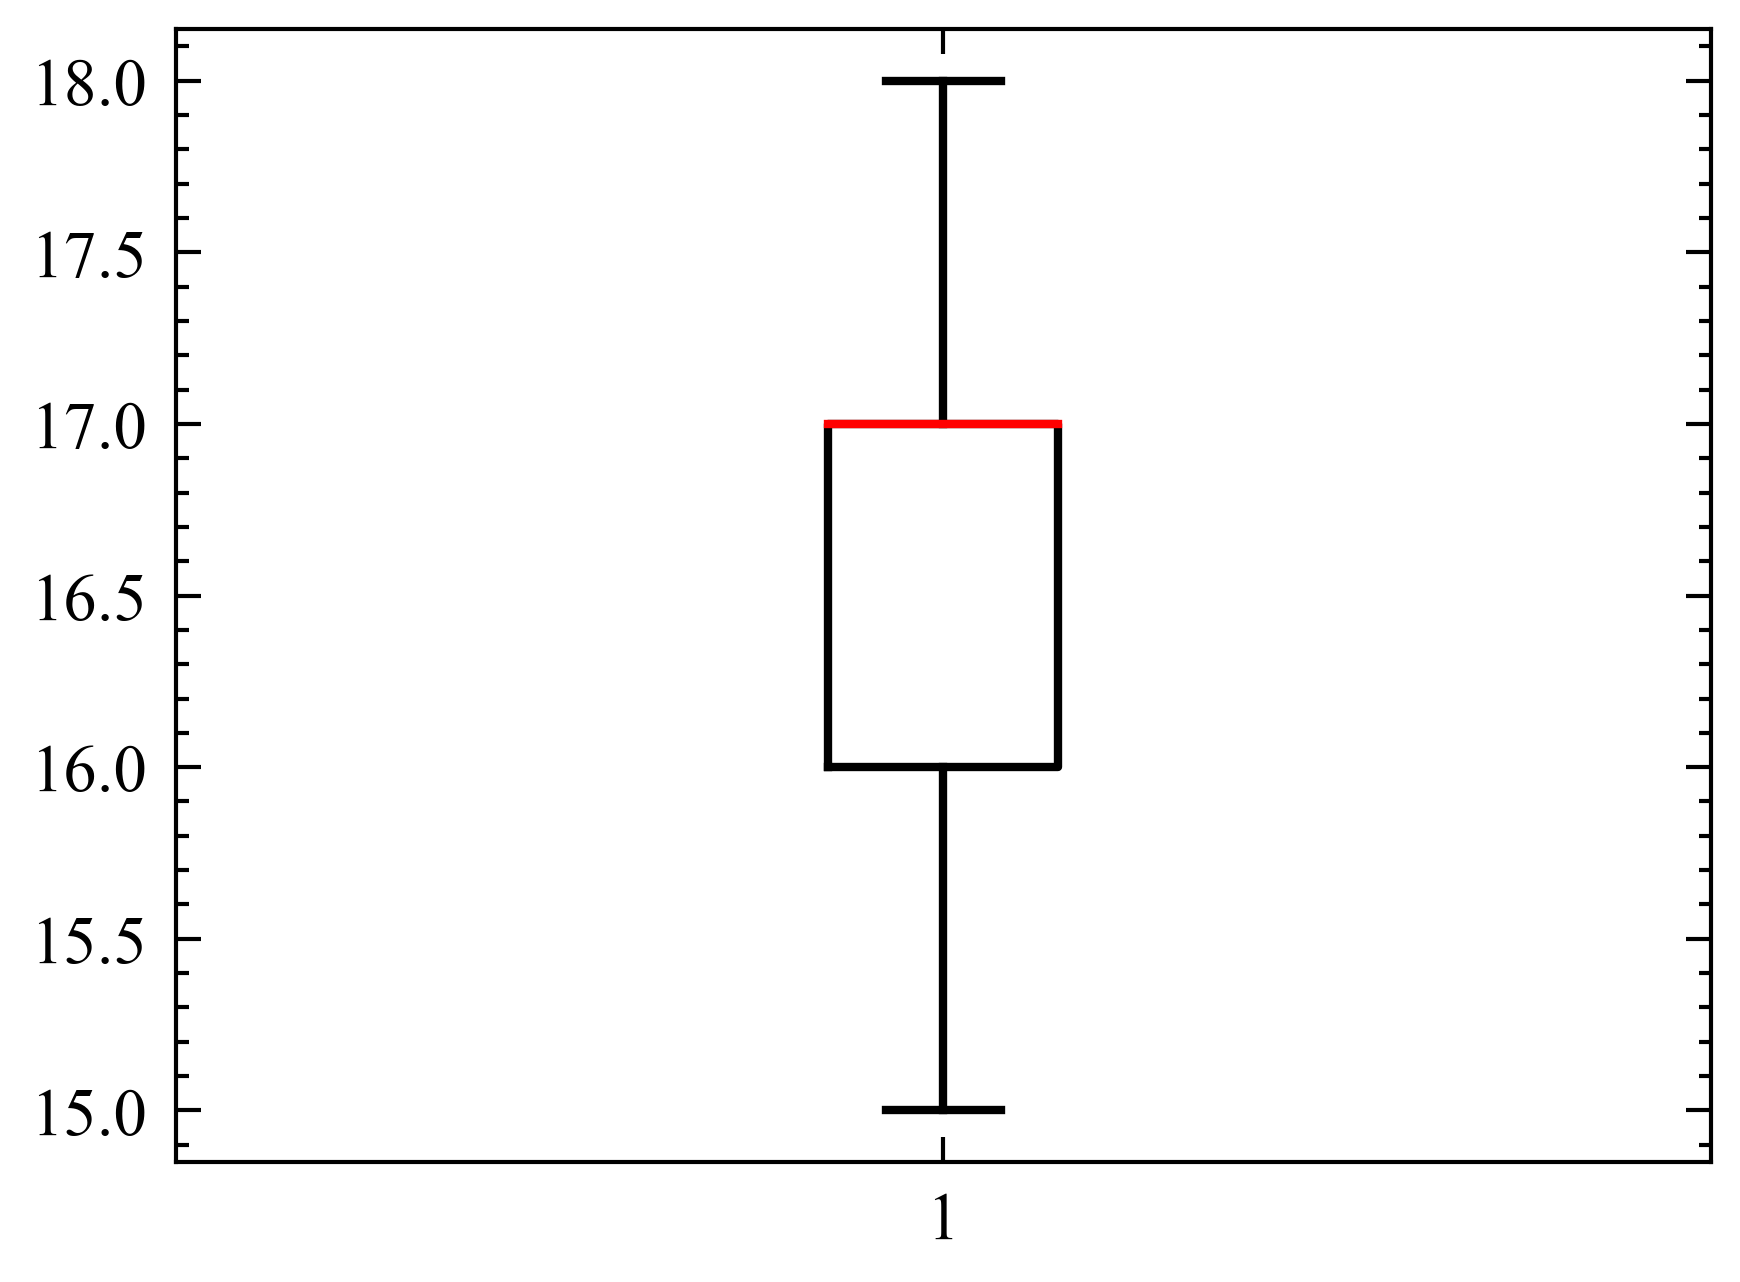

In [10]:
avgs = []
for i in range(len(data)):
    print(min(data[i]))
    avgs.append(min(data[i]))
plt.boxplot(avgs)

In [11]:
print(sum(avgs)/len(avgs))

16.7


In [12]:
run_data = []
relative = []
for file in glob.glob('*_data.txt'):
    with open(file) as f:
        a = json.load(f)
        run_data.append(a["FHR_cummulative"])
        relative.append(a['regen'])
print(run_data[0][1])


10.5


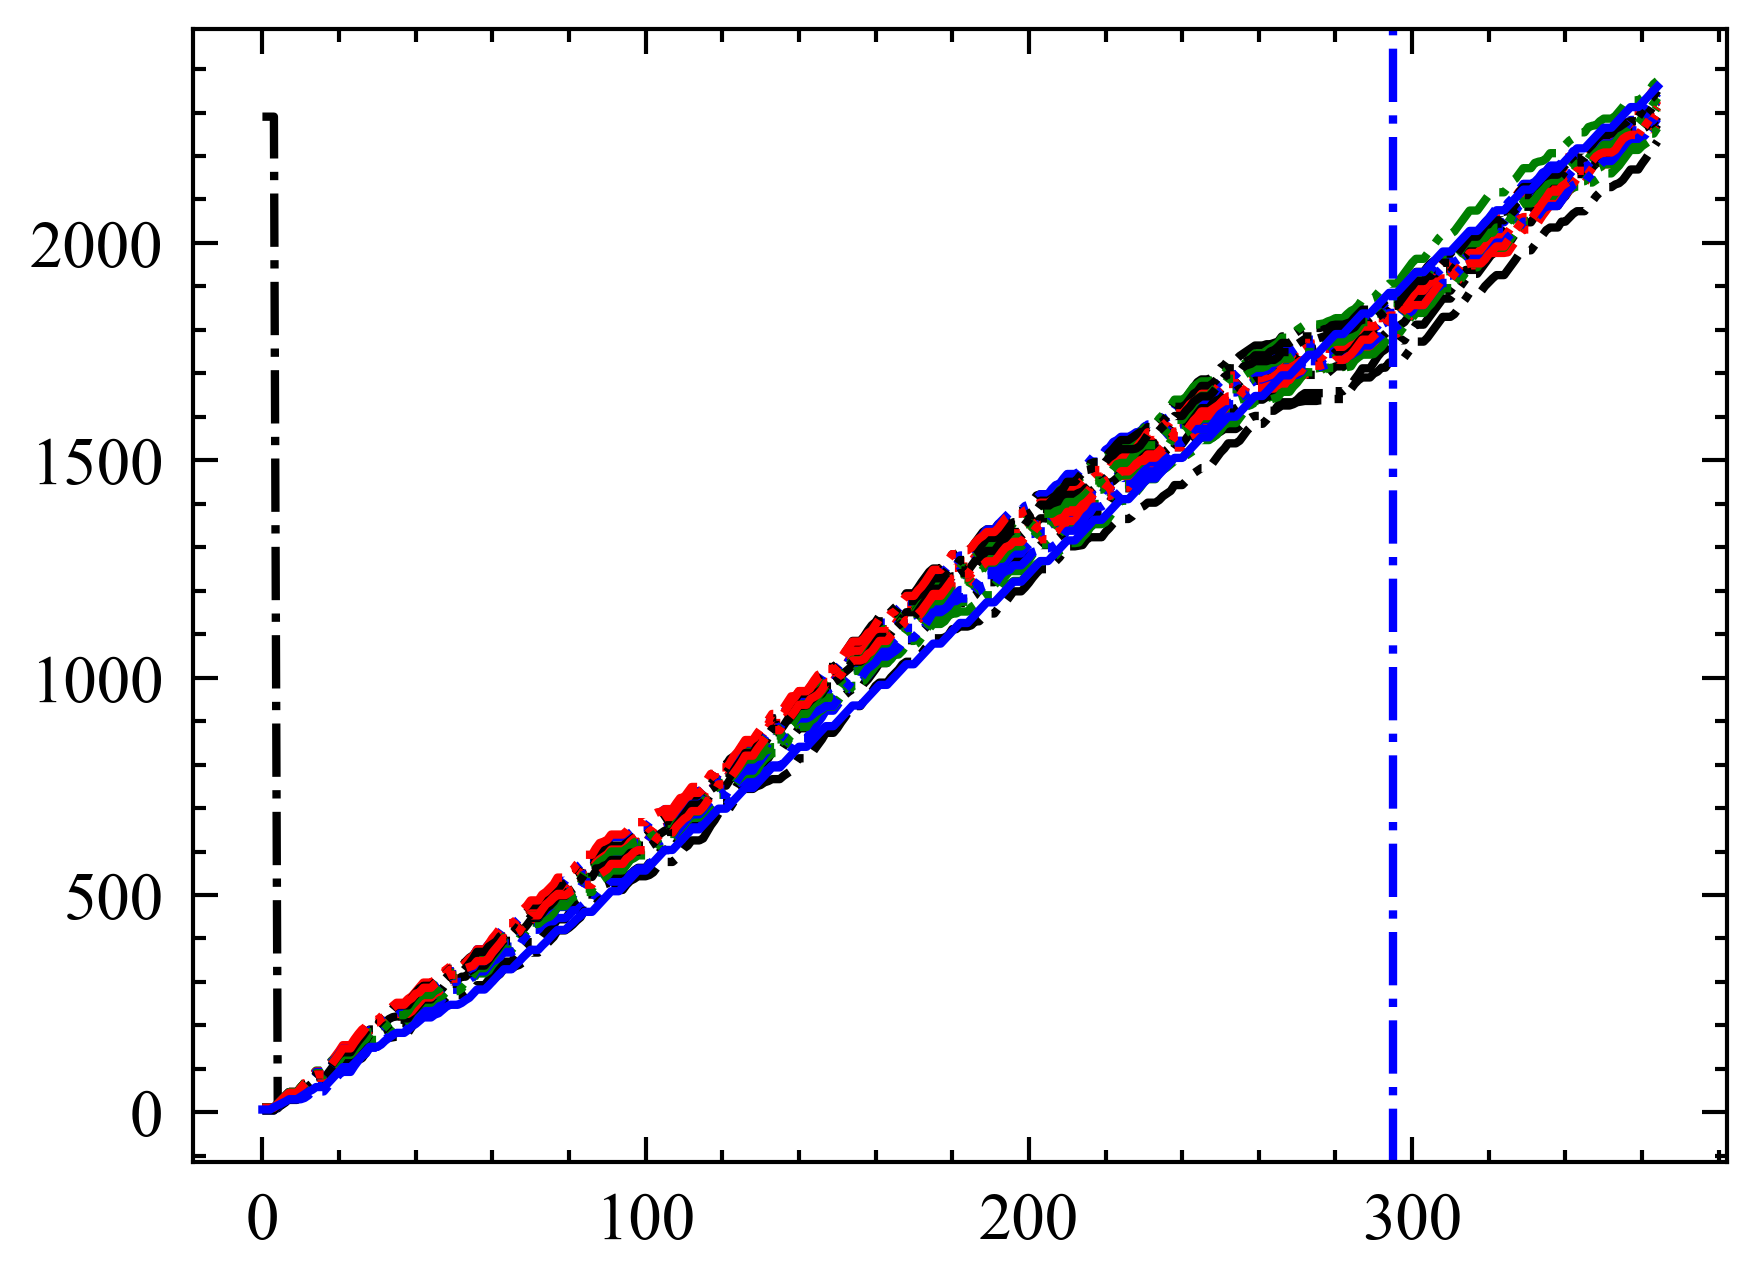

In [13]:
#for i in range(len(run_data)):
#    print(max(run_data[i]))
for i in range(len(run_data)):
    plt.plot(run_data[i], linestyle='dashdot')
plt.plot(a["FT_FMP"], linestyle='-')
plt.axvline(x=295, color='b', linestyle='dashdot')
plt.savefig('FHR.jpg', dpi=300)

<function matplotlib.pyplot.show(*args, **kw)>

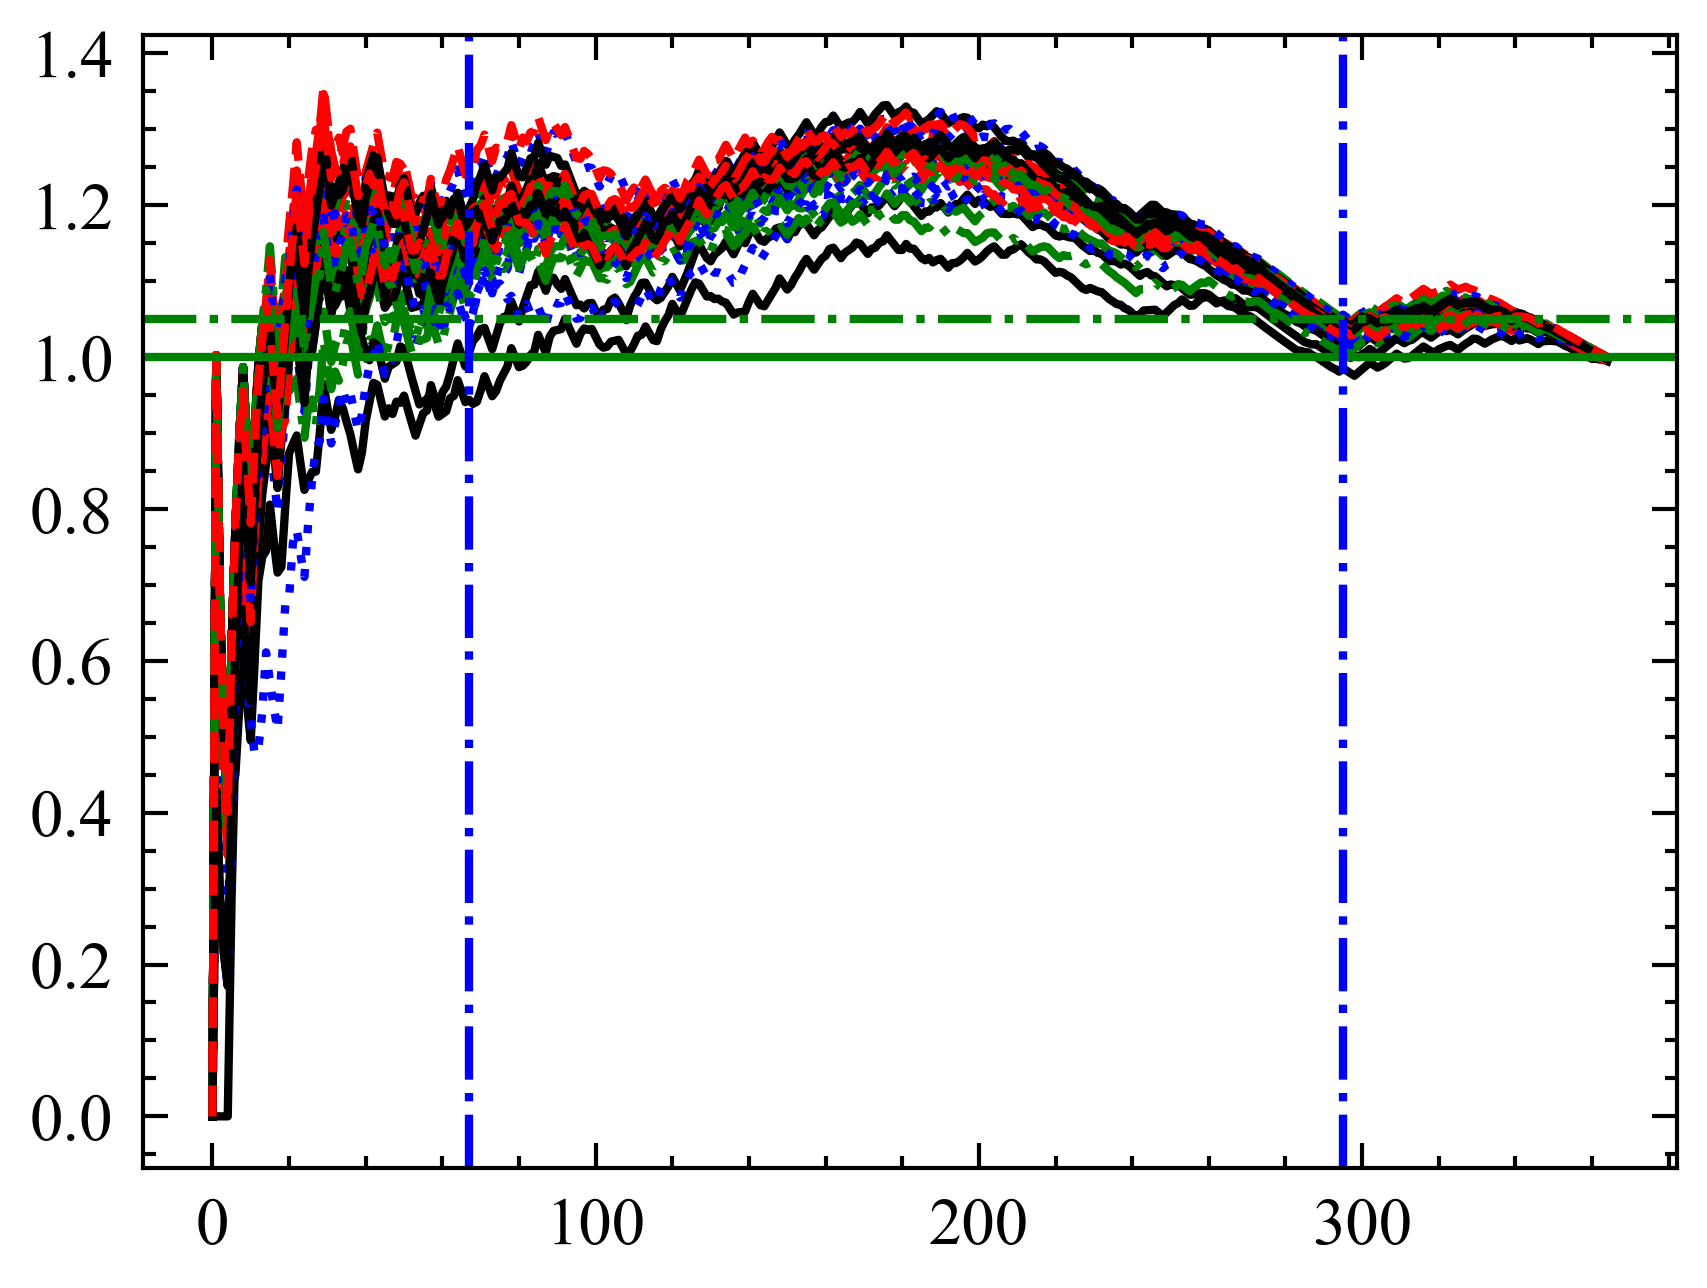

In [14]:
for i in range(len(relative)):
    plt.plot(relative[i])
plt.axhline(y=1, color='g', linestyle='-')
plt.axhline(y=1.05, color='g', linestyle='dashdot')
plt.axvline(x=67, color='b', linestyle='dashdot')
#plt.axvline(x=120, color='r', linestyle='-')
#plt.axvline(x=240, color='r', linestyle='-')
#plt.axvline(x=304, color='r', linestyle='-')
#plt.axvline(x=337, color='r', linestyle='-')
#plt.axvline(x=344, color='r', linestyle='-')
#plt.axvline(x=351, color='r', linestyle='-')
#plt.axvline(x=358, color='r', linestyle='-')
plt.axvline(x=295, color='b', linestyle='dashdot')
plt.show

In [15]:
bound = []

line_max = []
line_min = []
line_avg = []
#for i in range(30):
   # for j in range(len(run_data)):
        #print(run_data[j][i])

In [16]:
bound = []

line = []
for j in range(len(run_data)):
    line.append(max(run_data[j]))
print(line)
bound.append(line)
#plt.plot(bound[0])


[2233.5, 2326.5, 2283.0, 2296.5, 2272.5, 2365.5, 2299.5, 2313.0, 2290.5, 2320.5, 2307.0, 2307.0, 2325.0, 2275.5, 2286.0, 2248.5, 2299.5, 2329.5, 2344.5, 2373.0, 2329.5, 2323.5, 2325.0, 2265.0, 2290.5, 2299.5, 2296.5, 2334.0, 2350.5, 2311.5]


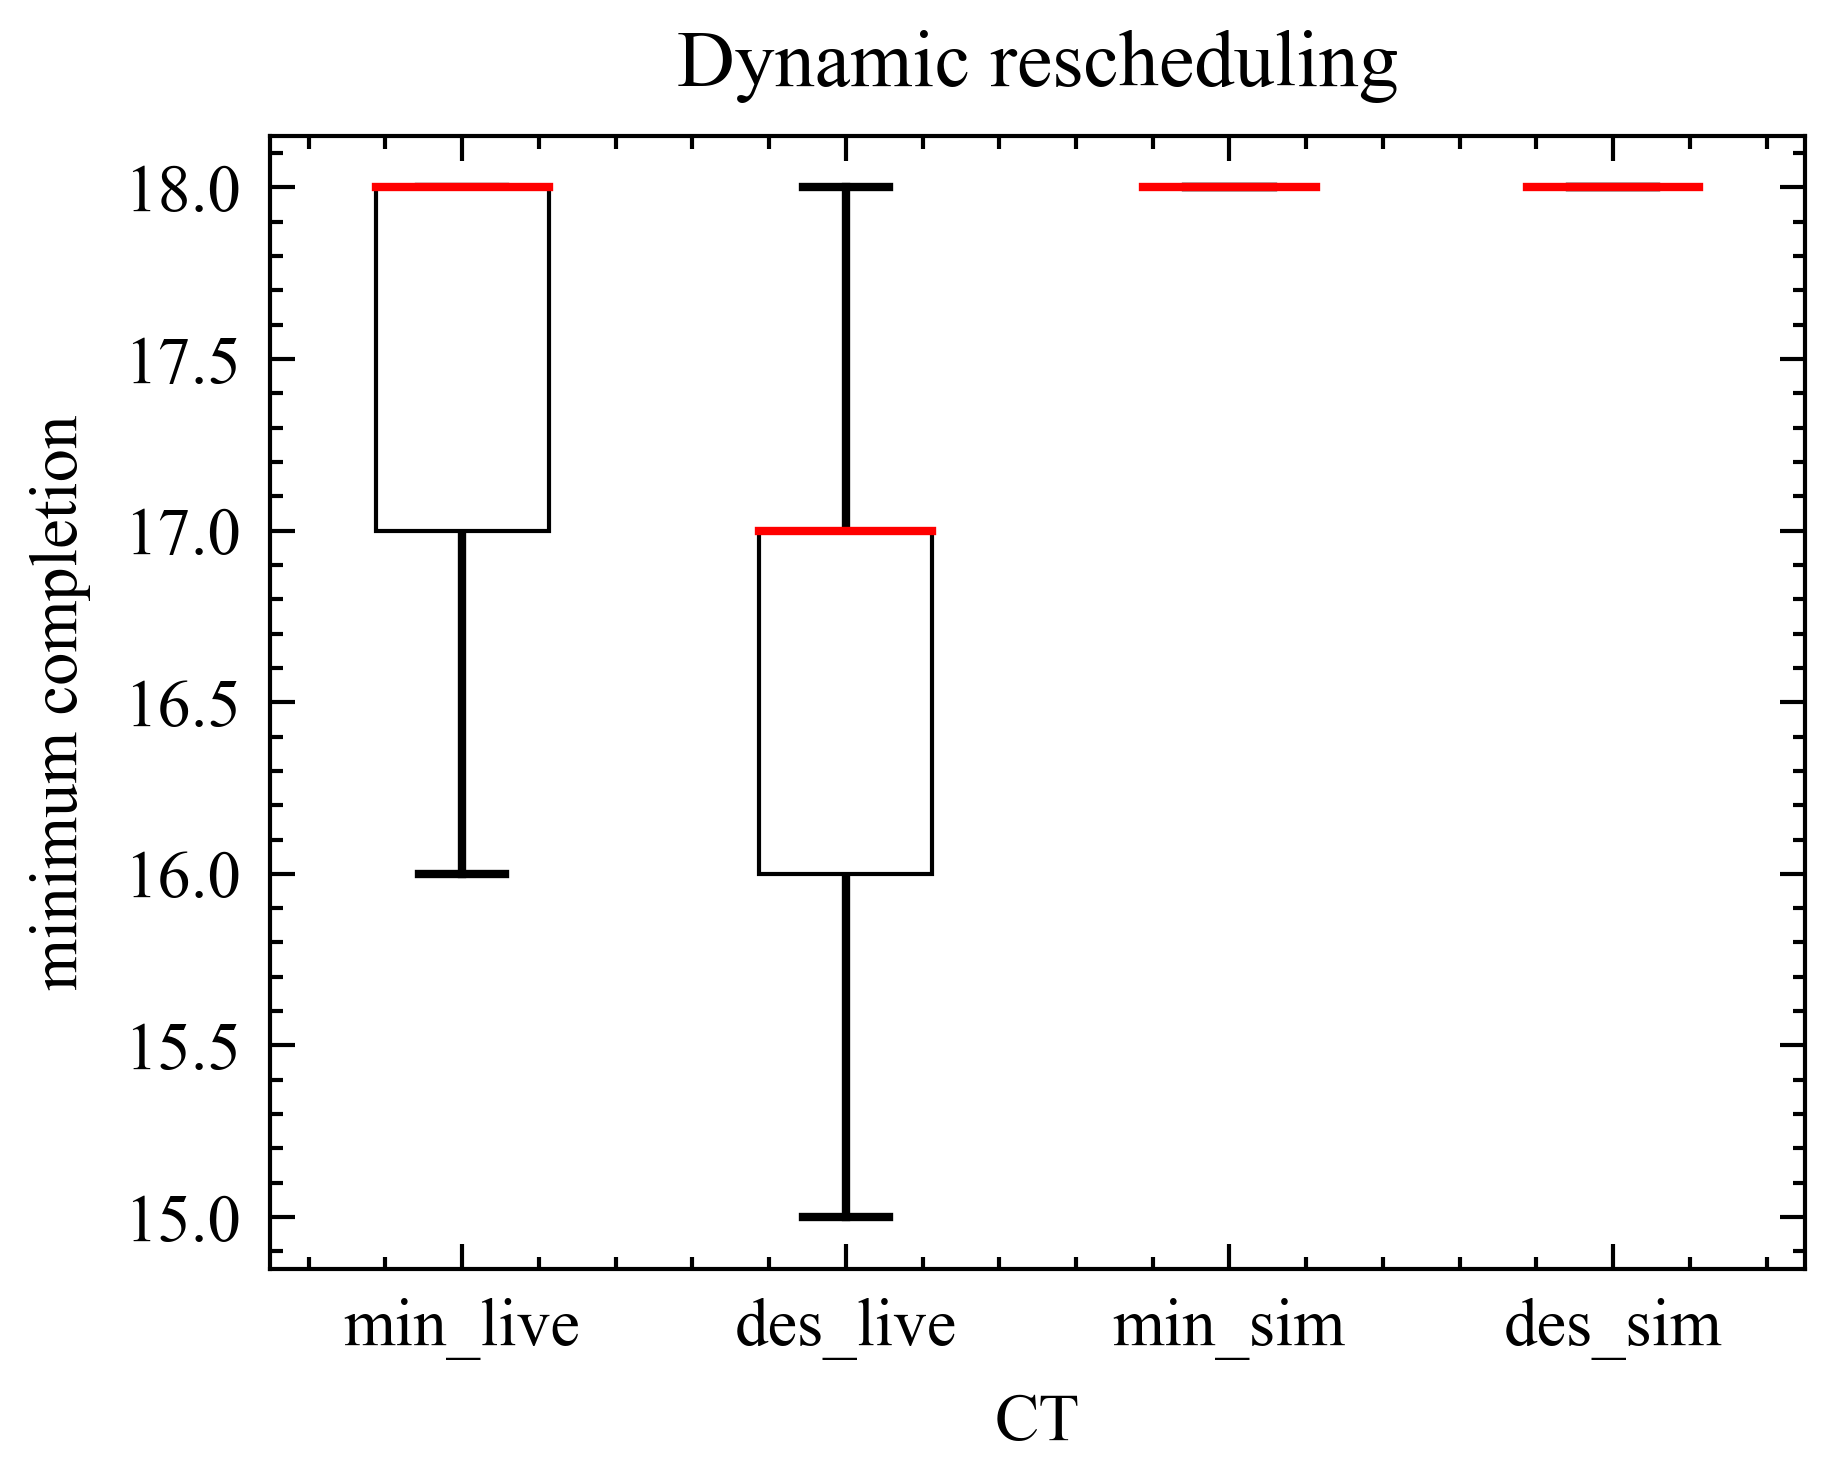

In [17]:
fig, ax = plt.subplots()
boxes = [data[0:30,0], data[0:30,1], data[0:30,3], data[0:30,4]]
bp = ax.boxplot(boxes, patch_artist=True)
ax.set(xlabel='CT'.format('Arial'))
ax.set(ylabel='minimum completion'.format('Arial'))
ax.set_title('Dynamic rescheduling'.format('Arial'))
ax.set_xticklabels(['min_live', 'des_live', 'min_sim', 'des_sim', f'{len(data)}'])
for box in bp['boxes']:
    box.set( color='k', linewidth=0.5)
    box.set( facecolor = 'w' )

for flier in bp['fliers']:
    flier.set(marker='o', color='r')#, alpha=0.5
fig.savefig('box.jpg', dpi=300)

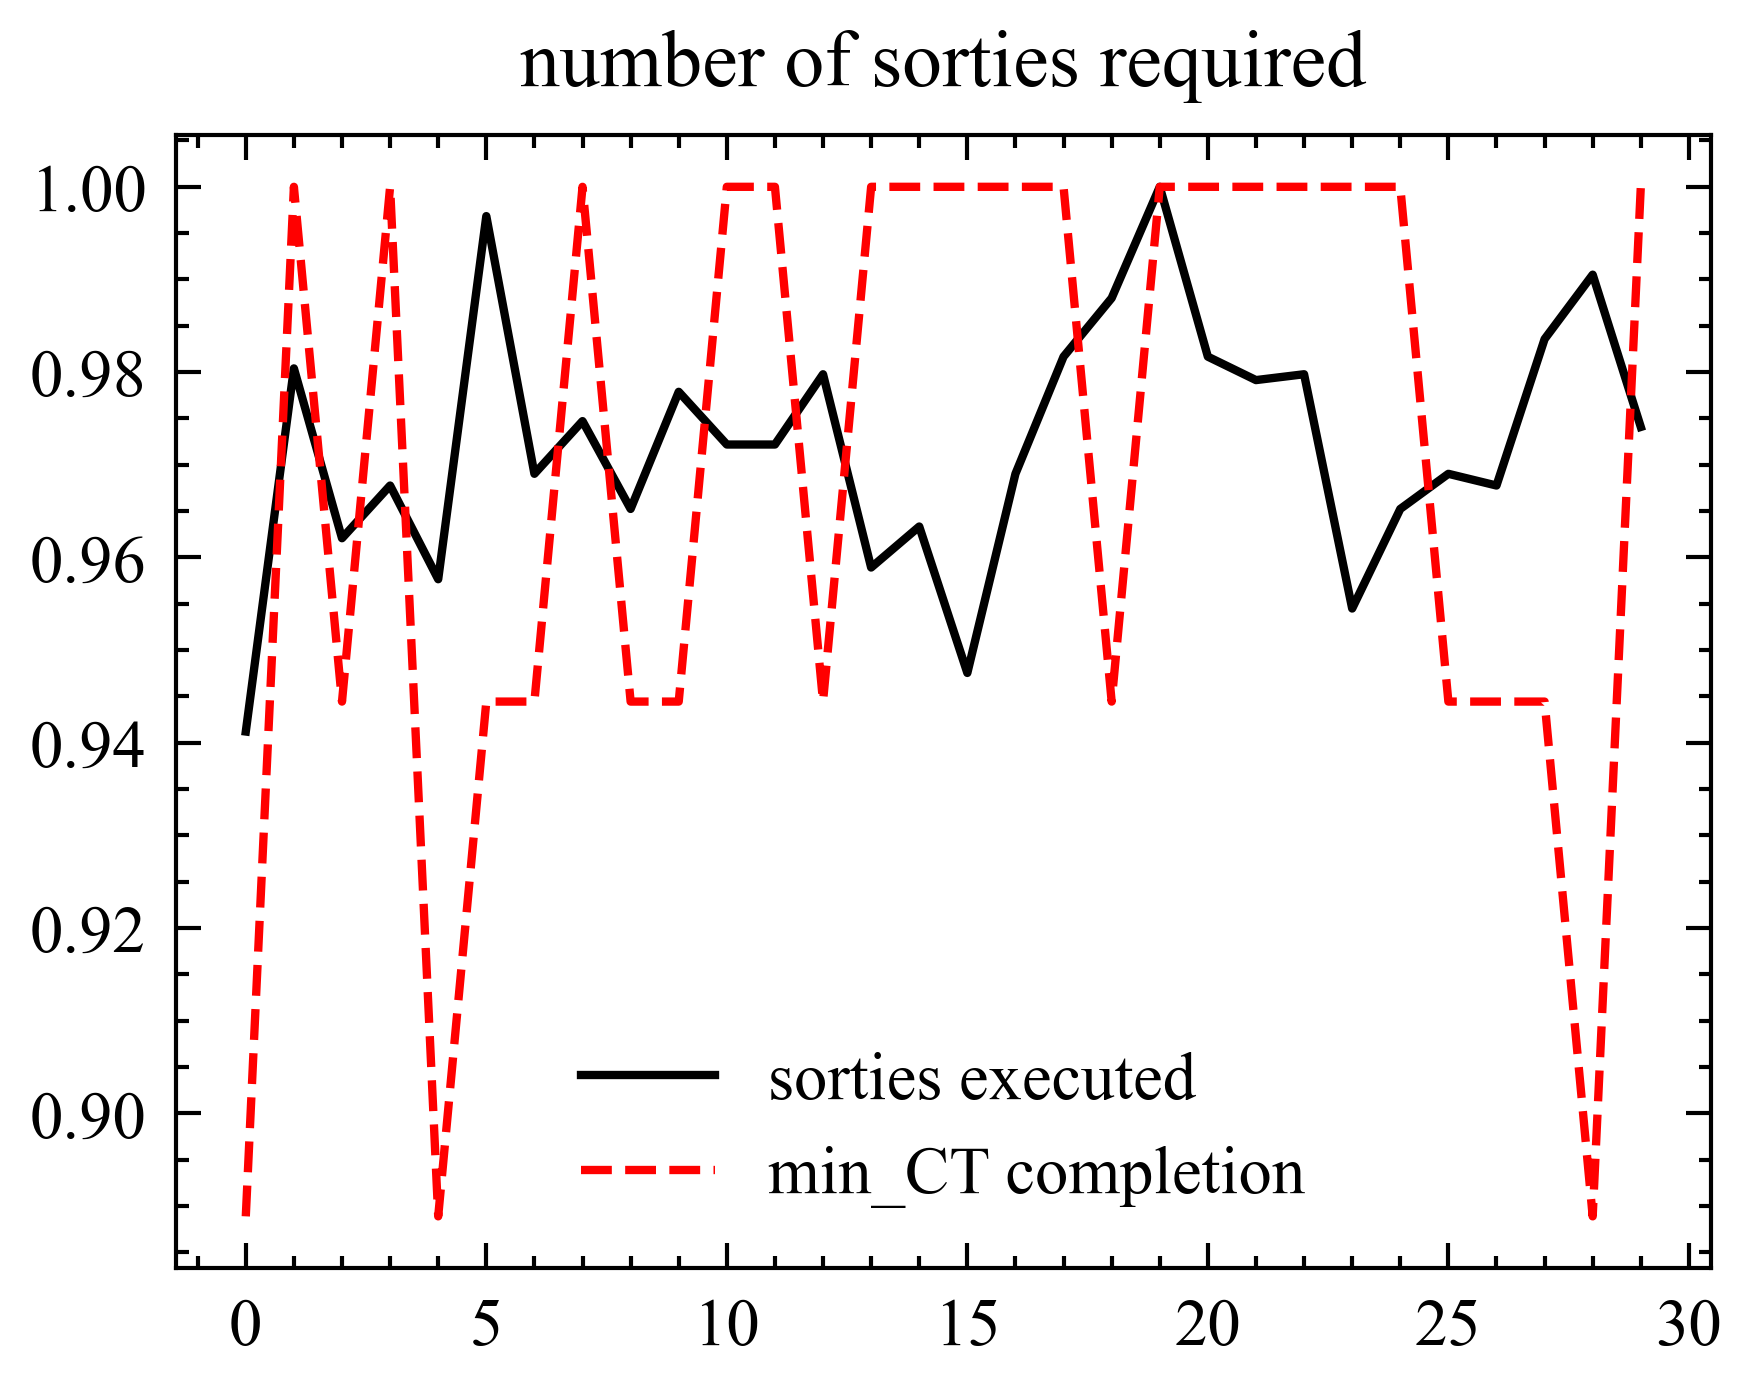

In [18]:
plt.plot(data[:,2]/max(data[:,2]), label='sorties executed')
plt.plot(data[:,0]/max(data[:,0]), c='r', label='min_CT completion')
plt.title('number of sorties required')
plt.legend()
plt.savefig('sorties_normalized.jpg', dpi=300)

In [19]:
covariance = np.cov(data[:,2]/max(data[:,2]), (data[:,0]/10))
r_pearson = pearsonr(data[:,2], data[:,0])
print(r_pearson[0]) #pearson r
print(r_pearson[1]) #significance for pearson r

0.07495297937835958
0.6938434095664876


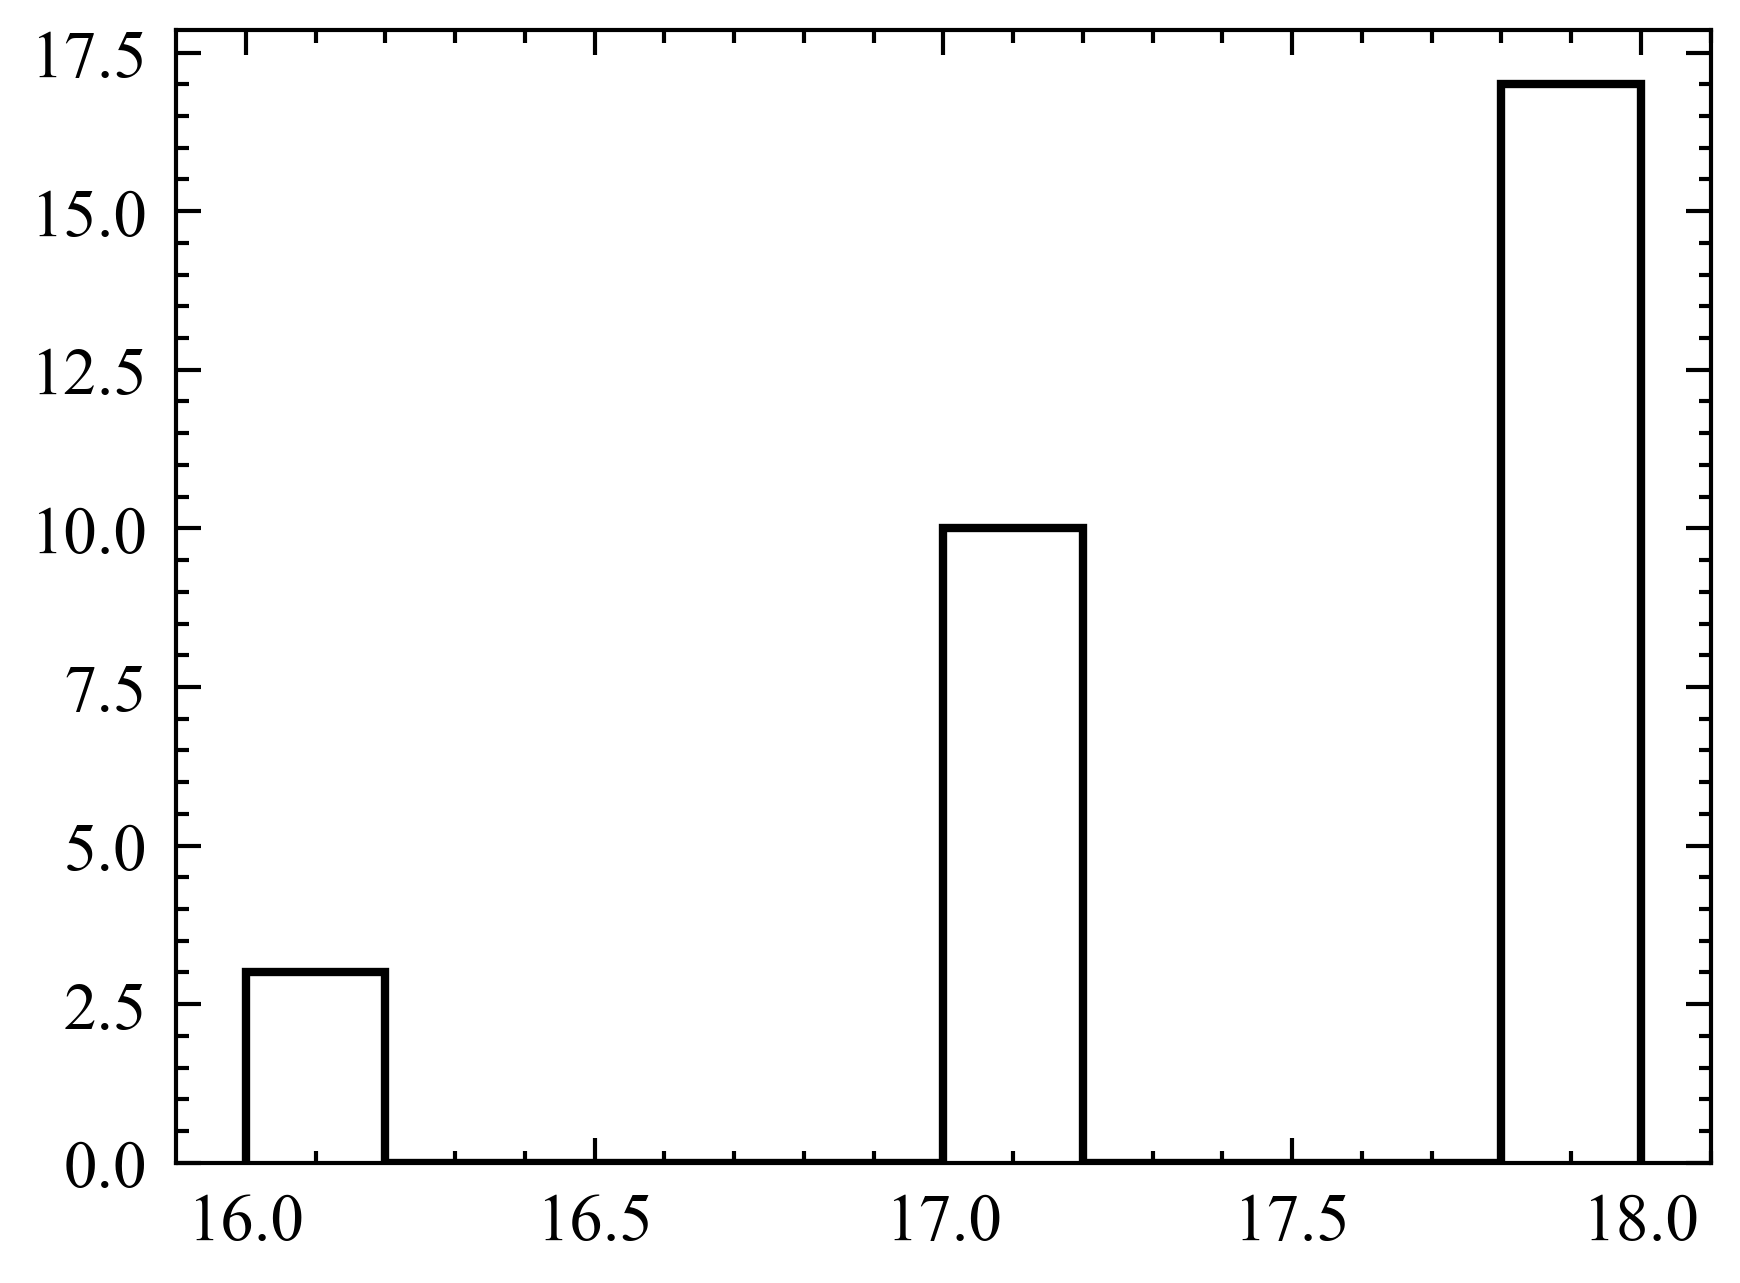

In [20]:
plt.hist(data[:,0], histtype='step')
plt.show()

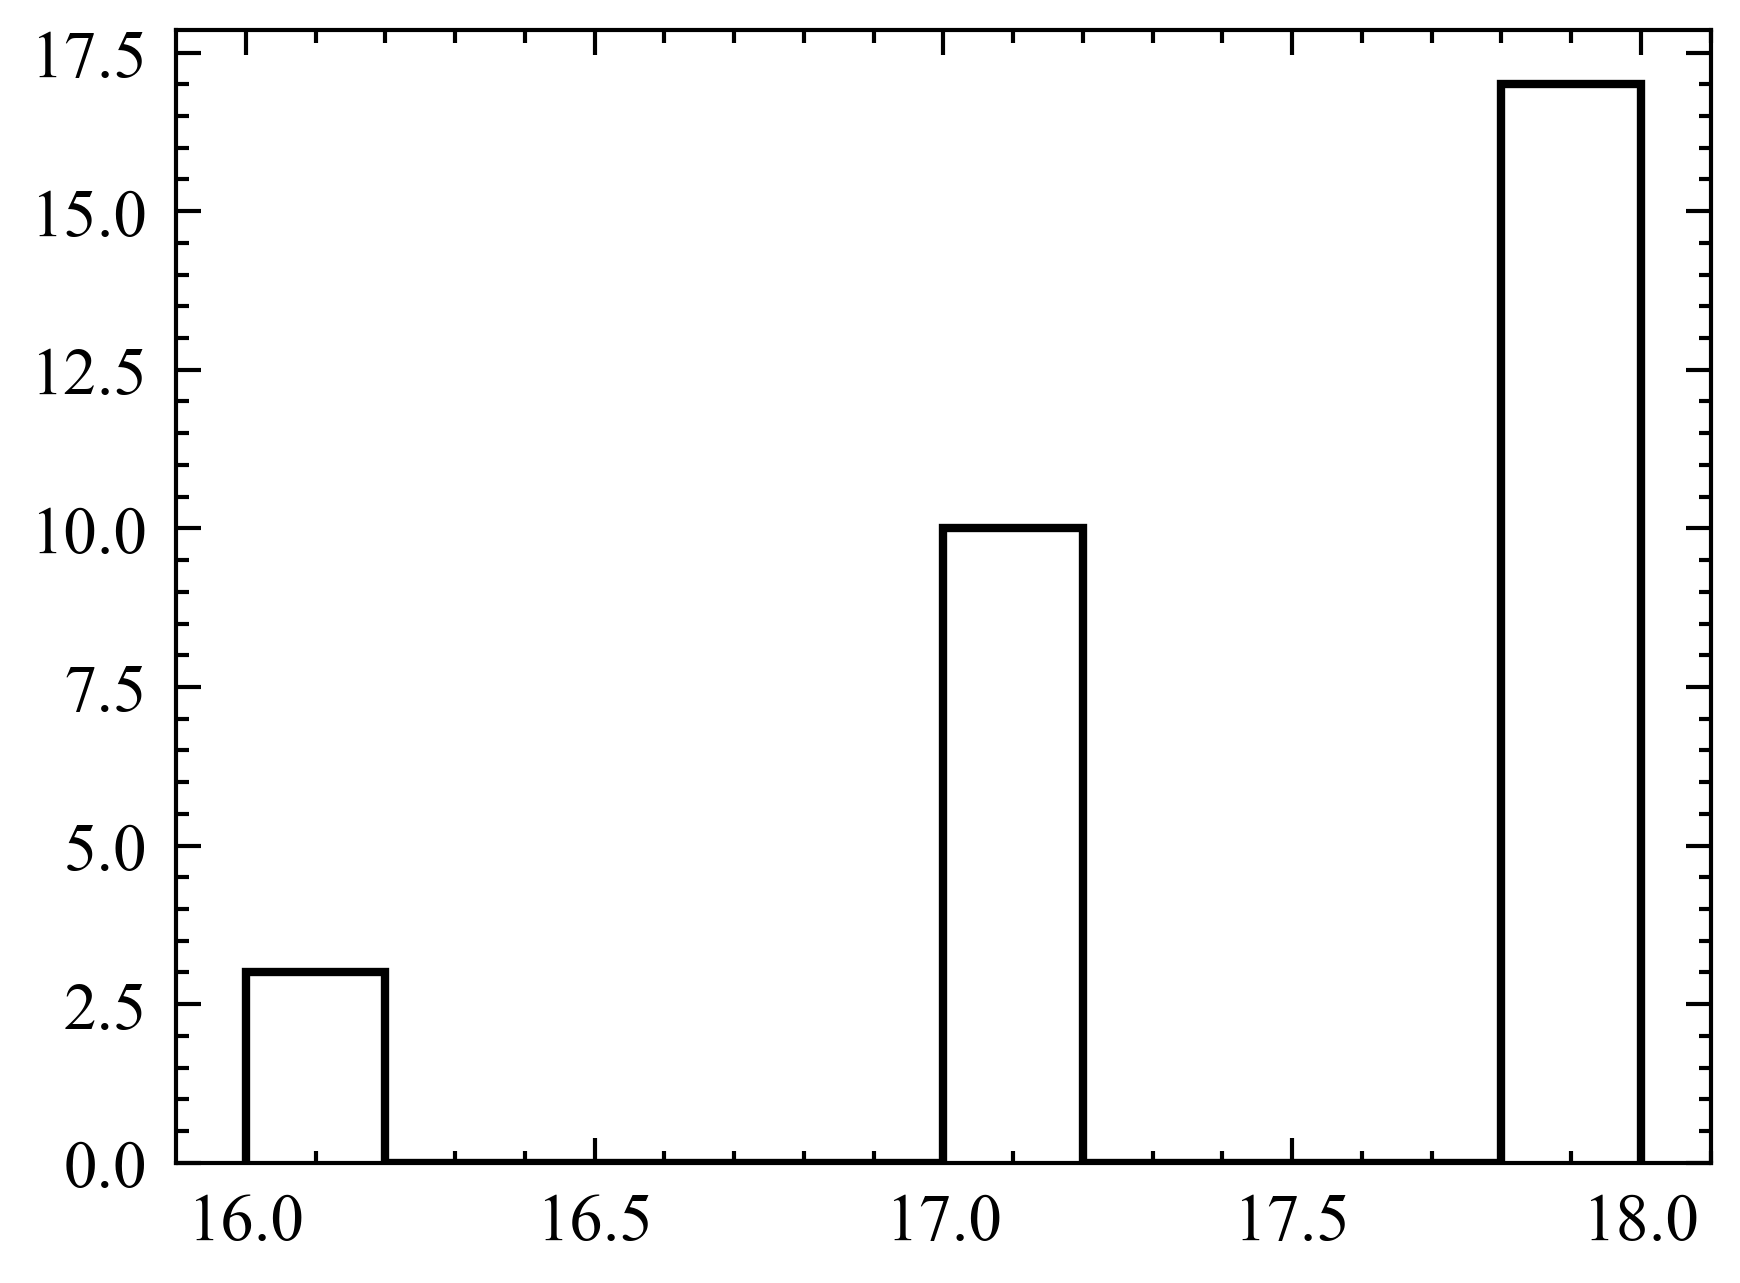

In [21]:
plt.hist(data[0:70,0], histtype='step')
plt.show()